In [1]:
# import required dependencies
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
from scipy import stats

In [2]:
# read the datafile
df = pd.read_csv('blockbusters.csv')
df.head()

,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year
0,Action,Adventure,Drama,7.4,135,1,PG-13,Walt Disney Pictures,Black Panther,"$700,059,566",2018
1,Action,Adventure,Sci-Fi,8.5,156,2,PG-13,Walt Disney Pictures,Avengers: Infinity War,"$678,815,482",2018
2,Animation,Action,Adventure,7.8,118,3,PG,Pixar,Incredibles 2,"$608,581,744",2018
3,Action,Adventure,Drama,6.2,129,4,PG-13,Universal Pictures,Jurassic World: Fallen Kingdom,"$416,769,345",2018
4,Action,Comedy,NaN,7.8,119,5,R,20th Century Fox,Deadpool 2,"$318,491,426",2018


In [6]:
# print("Data types before conversion:")
# print(df.dtypes)

# clean up world_wide gross column and convert to integer
df["worldwide_gross"] = df['worldwide_gross'].replace({'\$' : '', ',' : ''}, regex=True).astype(float)
df

# print("Data types after conversion:")
# print(df.dtypes)

# filter data on the top studios
studios_df = df.loc[df['studio'].isin(['20th Century Fox','Paramount Pictures','Universal Pictures','Walt Disney Pictures','Warner Bros'])]
studios_df


,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year
0,Action,Adventure,Drama,7.4,135,1,PG-13,Walt Disney Pictures,Black Panther,700059566.0,2018
1,Action,Adventure,Sci-Fi,8.5,156,2,PG-13,Walt Disney Pictures,Avengers: Infinity War,678815482.0,2018
3,Action,Adventure,Drama,6.2,129,4,PG-13,Universal Pictures,Jurassic World: Fallen Kingdom,416769345.0,2018
4,Action,Comedy,NaN,7.8,119,5,R,20th Century Fox,Deadpool 2,318491426.0,2018
5,Action,Adventure,Drama,7.9,147,6,PG-13,Paramount Pictures,Mission: Impossible - Fallout,220159104.0,2018
...,...,...,...,...,...,...,...,...,...,...,...
428,Thriller,Crime,Action,6.8,96,9,R,Warner Bros,The Enforcer,46236000.0,1976
429,History,Drama,Action,6.7,132,10,PG,Universal Pictures,Midway,43220000.0,1976
430,Drama,Crime,NaN,8.1,125,4,R,Warner Bros,Dog Day Afternoon,50000000.0,1975
434,Family,Western,Comedy,6.2,100,8,G,Walt Disney Pictures,The Apple Dumpling Gang,36853000.0,1975


In [7]:
# get the average gross of the top studios
studios_average_df = studios_df.groupby('studio', as_index=False)['worldwide_gross'].mean()
studios_average_df

,studio,worldwide_gross
0,20th Century Fox,4.214770e+08
1,Paramount Pictures,3.589809e+08
2,Universal Pictures,3.074950e+08
3,Walt Disney Pictures,5.122966e+08
4,Warner Bros,4.136588e+08


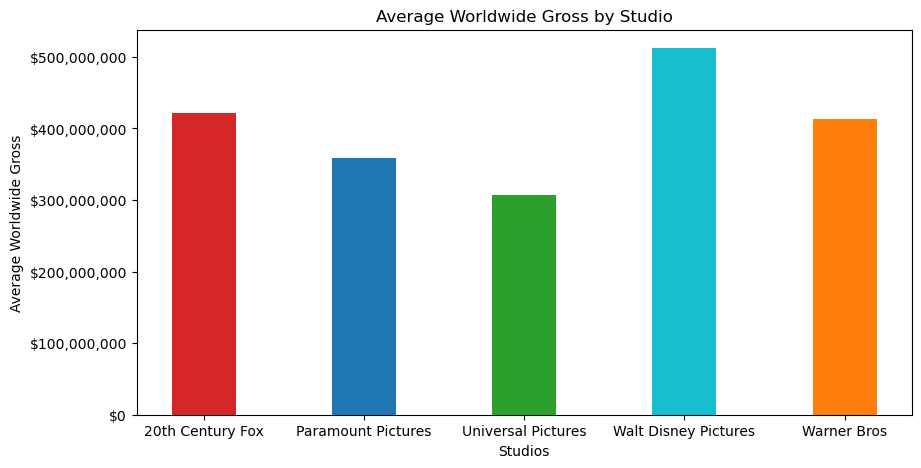

In [26]:
# create a bar chart for average worldwide_gross by studio
studios = studios_average_df['studio']
gross = studios_average_df['worldwide_gross']
colors = ['tab:red','tab:blue','tab:green','tab:cyan','tab:orange']

fig, ax = plt.subplots(1,1, figsize = (10,5))

plt.bar(studios, gross, color = colors, width = 0.4)
plt.xlabel("Studios")
plt.ylabel("Average Worldwide Gross")
plt.title("Average Worldwide Gross by Studio")

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# plt.grid(axis = 'y')

plt.show()

In [44]:
# get the count of Main_Genre by the studio
fox_genre_df = studios_df.loc[df['studio'] == '20th Century Fox']
fox_genre_df = fox_genre_df.groupby('Main_Genre', as_index=False)['title'].count()
fox_genre_df

paramount_genre_df = studios_df.loc[df['studio'] == 'Paramount Pictures']
paramount_genre_df = paramount_genre_df.groupby('Main_Genre', as_index=False)['title'].count()
paramount_genre_df

,Main_Genre,title
0,Action,2
1,Adventure,4
2,Animation,4
3,Comedy,8
4,Crime,3
5,Drama,3
6,Fantasy,1
7,Horror,1
8,Music,1
9,Romance,14


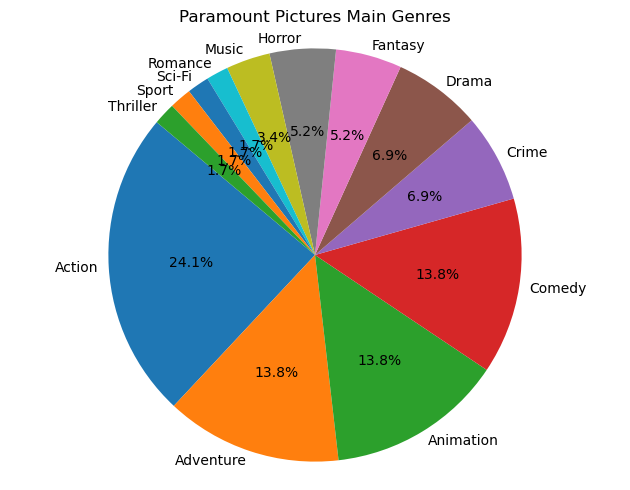

In [73]:
# create Main_Genre pie charts by studio

#fox_genres = fox_genre_df['Main_Genre']
#fox_films = fox_genre_df['title']

#fig, ax = plt.subplots()
#ax.pie(fox_films, labels=fox_genres)

paramount_genres = paramount_genre_df['Main_Genre']
paramount_films = paramount_genre_df['title'].sort_values(ascending=False)

fig, ax = plt.subplots()
ax.pie(paramount_films, labels=paramount_genres, autopct='%1.1f%%', startangle=140, labeldistance=1.05)

plt.axis('equal')
plt.tight_layout()
plt.title("Paramount Pictures Main Genres")

plt.show()